KNN : K Nearest Neighbors Ex

In [52]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# load the dataset 
df = pd.read_csv("Classified Data", index_col=0) # Read CSV file and set the first column as an index
df.head() # Display first few rows of the dataset

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [54]:
# ---- Data Preprocessing ---- #
# StandardScaler is used to standardize numerical features
# It ensures each feature has mean = 0 and standard deviation = 1 to improve KNN performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Creates an instance of StandardScaler

In [55]:
# Fit the scaler to the features (excluding the target column) and transform them
scalar.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))

In [56]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]], shape=(1000, 10))

In [57]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [58]:
# Convert scaled features back into a DataFrame with original column names
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [59]:
# ---- Splitting Data into Training & Test Sets ---- #
from sklearn.model_selection import train_test_split

X = df_feat #  Features (after scaling)
y = df['TARGET CLASS'] # Target labels

# # Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
# ---- Train KNN Model (K=1) ---- #
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)  # Initialize KNN classifier with K=1 (1 nearest neighbor)

knn.fit(X_train, y_train)  # Train the model using training data

KNeighborsClassifier(n_neighbors=1)

In [61]:
# ---- Predict Using KNN ---- #
pred = knn.predict(X_test)  # Make predictions on the test set

In [62]:
# ---- Evaluate Model Performance ---- #
from sklearn.metrics import classification_report, confusion_matrix

# Print classification metrics (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [63]:
# Print confusion matrix (shows correct & incorrect predictions)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Confusion Matrix:
 [[151   8]
 [ 15 126]]


In [64]:
# ---- Finding Optimal K (Hyperparameter Tuning) ---- #
error_rate = []  # Initialize a list to store error rates for different values of K

# Test KNN for K values from 1 to 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)  # Initialize KNN with different K values
    knn.fit(X_train, y_train)  # Train the model
    pred_i = knn.predict(X_test)  # Make predictions
    error_rate.append(np.mean(pred_i != y_test))  # Calculate the mean error rate

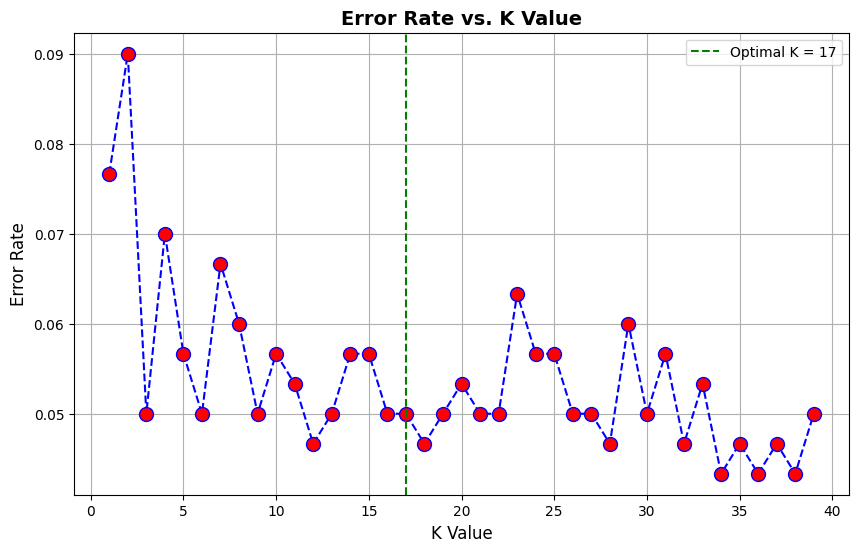

In [65]:
# ---- Visualizing Error Rate vs. K Value ---- #
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.axvline(17, color='green', linestyle='--', label='Optimal K = 17')  # Highlight best K
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate vs. K Value', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# ---- Train KNN Model with Optimal K=17 ---- #
knn = KNeighborsClassifier(n_neighbors=17)  # Set K=17 based on the error rate plot
knn.fit(X_train, y_train)  # Train the model again with K=17
pred = knn.predict(X_test)  # Make final predictions

In [67]:
# Print final classification metrics for K=17
print("Classification Report:\n", classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [68]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Confusion Matrix:
 [[153   6]
 [  9 132]]
